In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# display no of rows and column
data.shape

(1338, 7)

In [4]:
print(data.sex.value_counts(),"\n", data.children.value_counts(),data.smoker.value_counts(),data.region.value_counts())

male      676
female    662
Name: sex, dtype: int64 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 no     1064
yes     274
Name: smoker, dtype: int64 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [5]:
# Replacing the categorical variable with numerical variables 

data["sex"] = data["sex"].map({"male": 1,"female":0})
data["smoker"] = data["smoker"].map({"yes": 1,"no":0})
data["region"] = data["region"].map({"southeast": 0,"southwest":1,"northwest":2,"northeast":3})

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


Exploratory Data Analysis

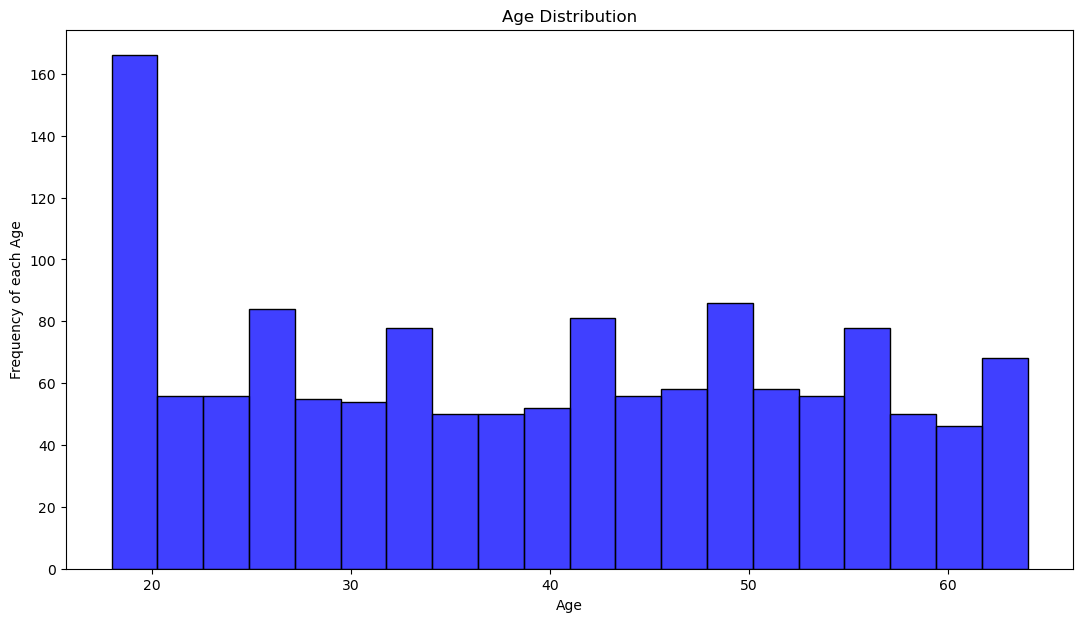

In [7]:
# univariable Analysis in this analysis we make one feature read at a time .
# check Age Distribution 


plt.figure(figsize = (13,7))
sns.histplot(data.age, bins = 20 , kde =False,color ="blue")
 
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency of each Age")
plt.show()          

Maximum people in a dataset are below the age of 20 

Text(0.5, 1.0, 'Gender Distribution')

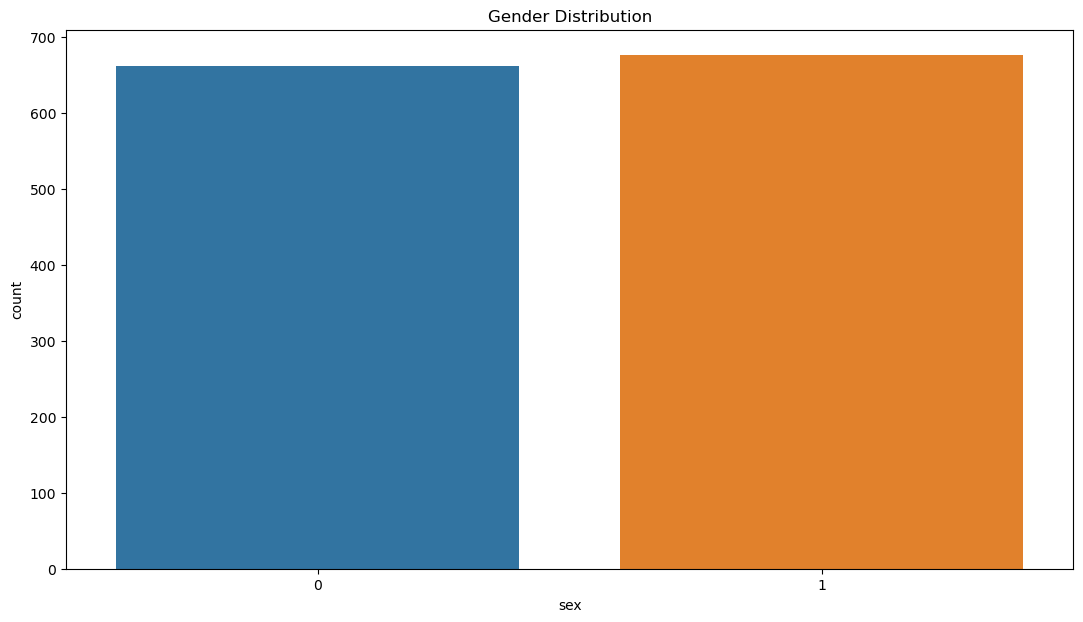

In [8]:
# check Sex Distribution 

plt.figure(figsize = (13,7))
sns.countplot(x = "sex", data = data)
plt.title("Gender Distribution")

From this above graph the distribution of sex is almost equal male and female

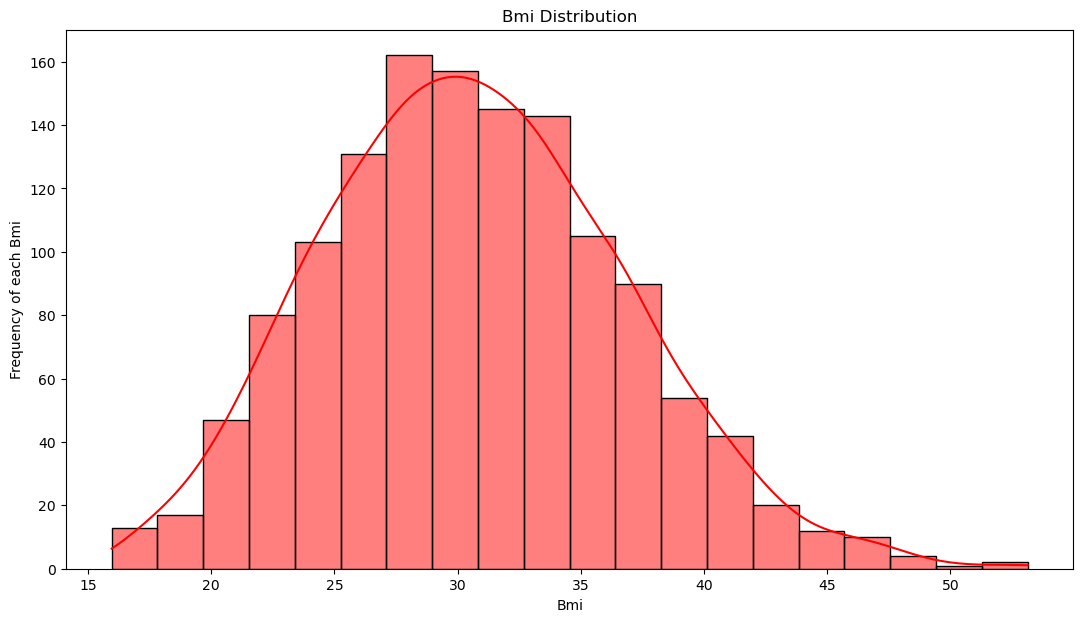

In [9]:
# check Bmi Distribution 

plt.figure(figsize = (13,7))
sns.histplot(data.bmi, bins = 20 , kde = True,color ="red")
 
plt.title("Bmi Distribution")
plt.xlabel("Bmi")
plt.ylabel("Frequency of each Bmi")
plt.show() 


The majority of the people have BMI in between 25 and 40 , which is considered and could be a major factor is increasing the medical cost

In [10]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Text(0.5, 1.0, 'children  Distribution')

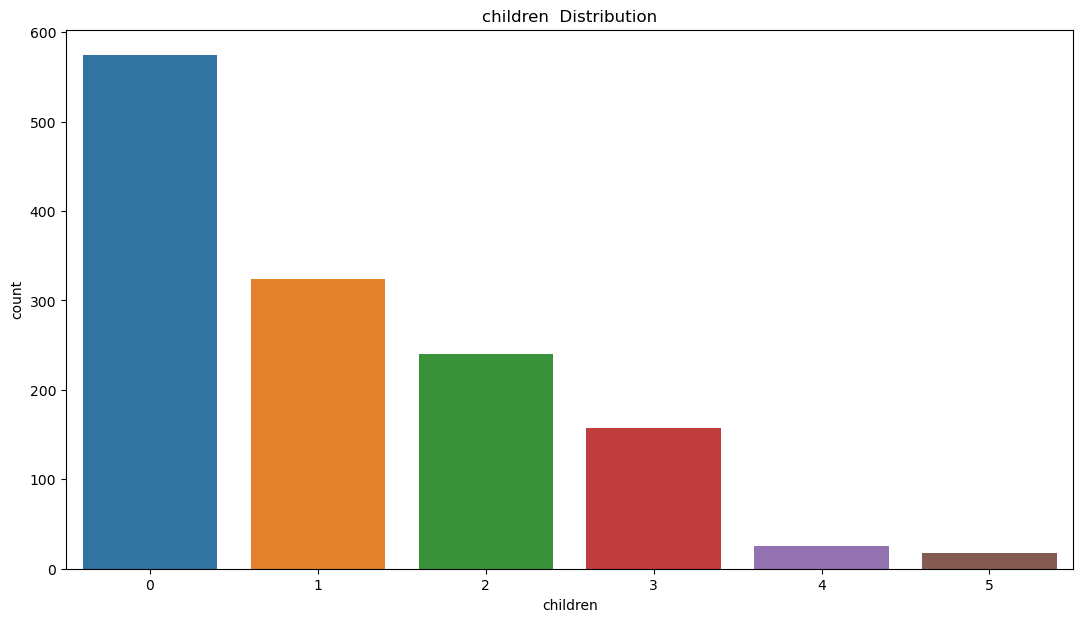

In [11]:
# check Children Distribution 

plt.figure(figsize = (13,7))
sns.countplot(x = "children", data = data)
plt.title("children  Distribution")

Text(0.5, 1.0, 'region Distribution')

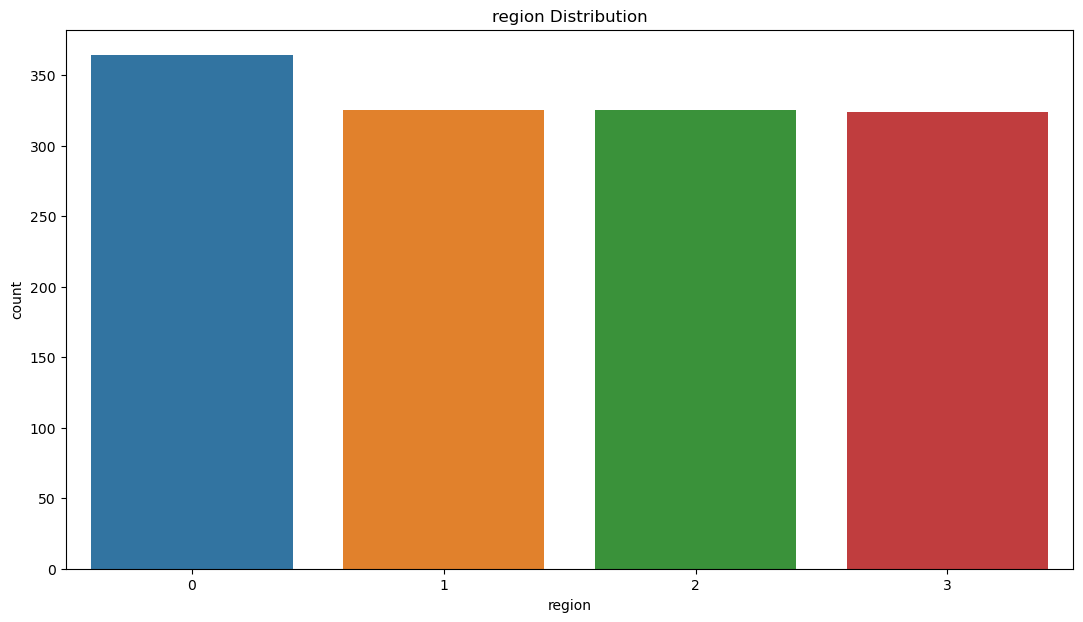

In [12]:

# check region Distribution 

plt.figure(figsize = (13,7))
sns.countplot(x = "region", data = data)
plt.title("region Distribution")

Text(0.5, 1.0, 'smoker Distribution')

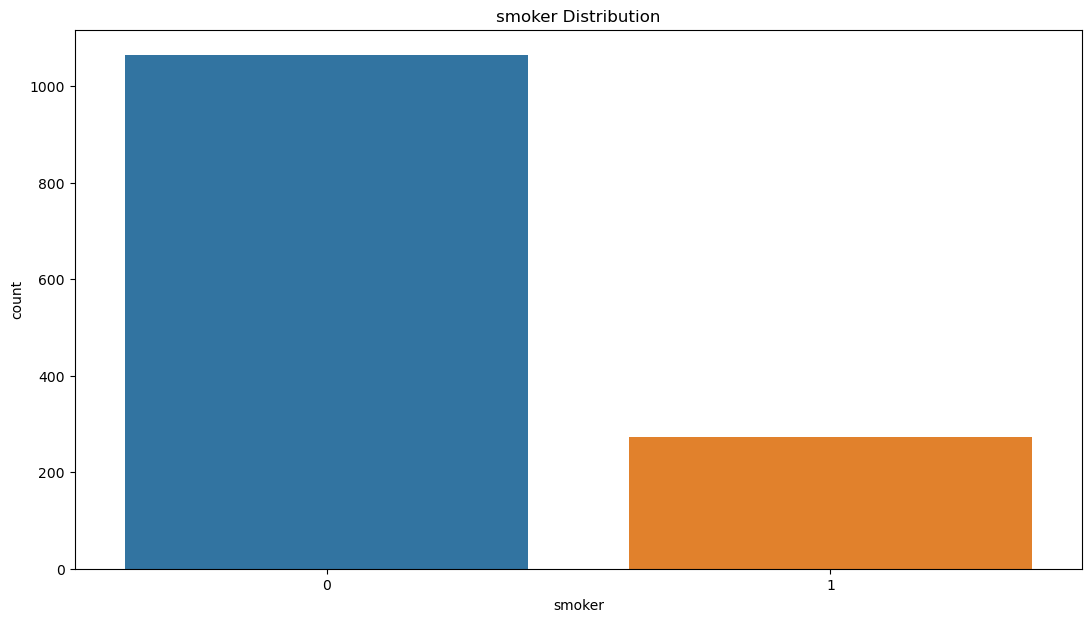

In [13]:
# check Smoker Distribution 

plt.figure(figsize = (13,7))
sns.countplot(x = "smoker", data = data)
plt.title("smoker Distribution")

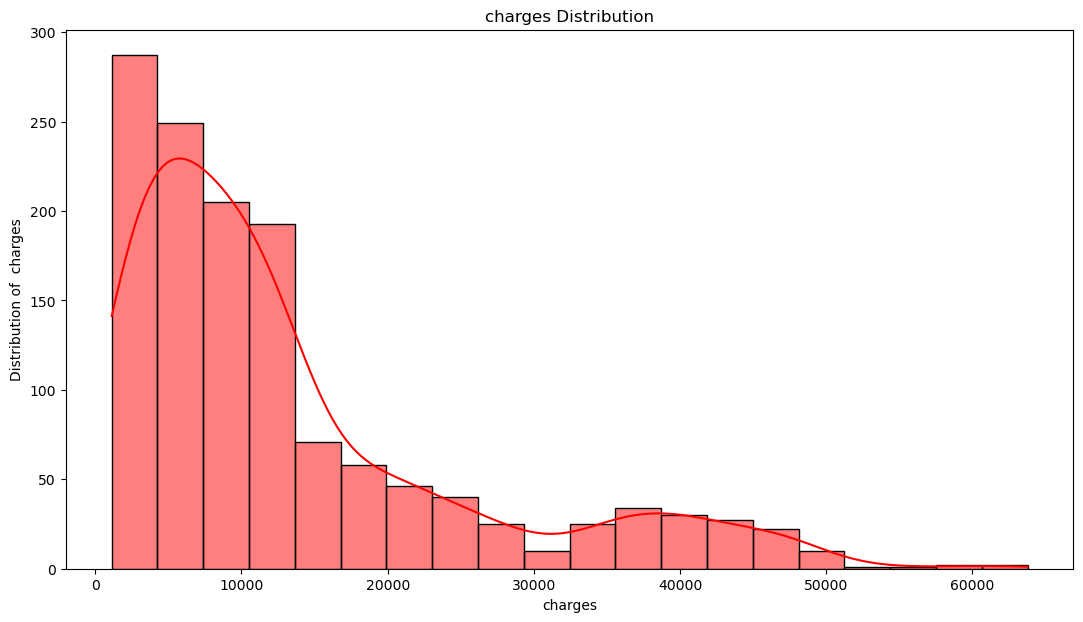

In [14]:
# check charges Distribution 

plt.figure(figsize = (13,7))
sns.histplot(data.charges, bins = 20 , kde = True,color ="red")
 
plt.title("charges Distribution")
plt.xlabel("charges")
plt.ylabel("Distribution of  charges")
plt.show() 

maximum people in the dataset are paying approx 1100 to 13000 for the medical charges. 


Bi - variate Analysis

<Figure size 1300x700 with 0 Axes>

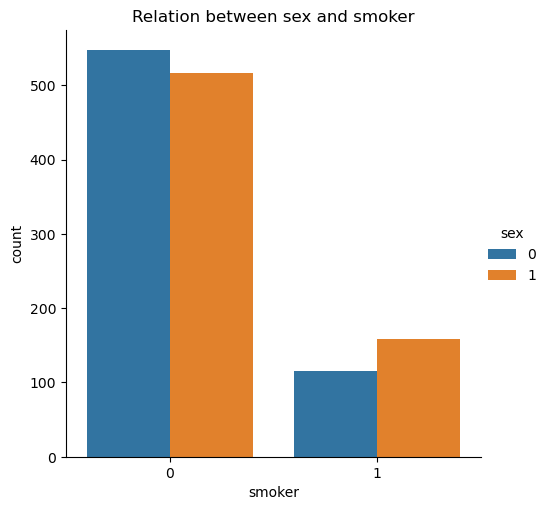

In [15]:
# Realtion between Gender and smoker

plt.figure(figsize=(13,7))
sns.catplot(x = "smoker",kind = "count",hue ="sex",data = data)
plt.xlabel("smoker")
plt.ylabel("count")
plt.title("Relation between sex and smoker")
plt.show()

We can observe that the no of male smokers are more than  compared to female smokers.so we can assume that cost of medical isurance of men is more as compared to female 

<Axes: title={'center': 'Box plot charges of Females'}, xlabel='charges', ylabel='smoker'>

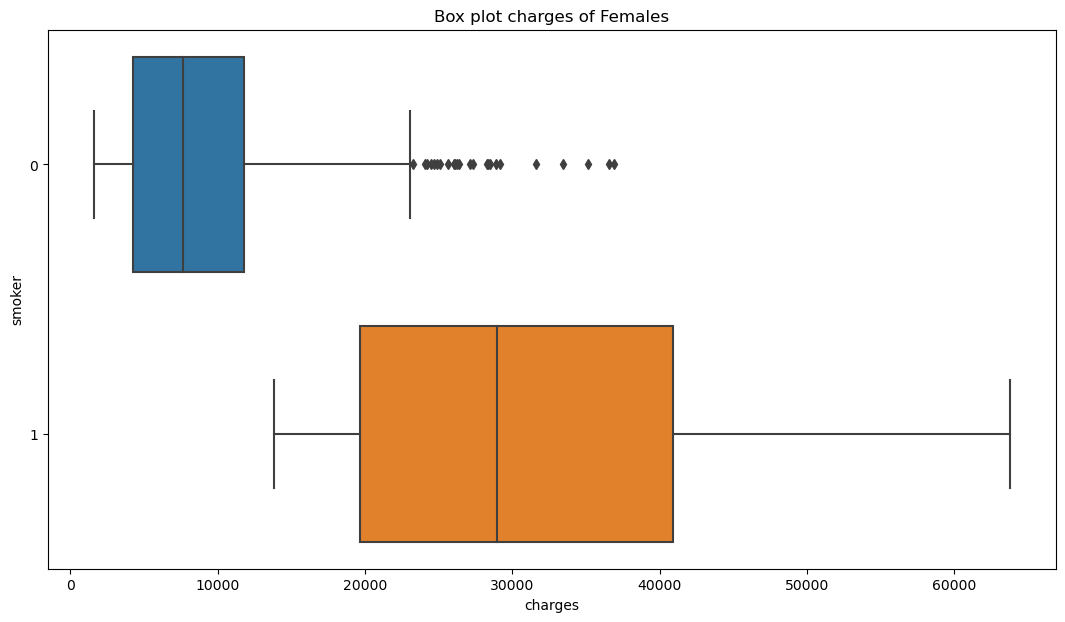

In [16]:
#Relationship between female and charges
plt.figure(figsize=(13,7))
plt.title("Box plot charges of Females")
sns.boxplot(y="smoker",x="charges",data = data[(data.sex==0)],orient = "h")

<Axes: title={'center': 'Box plot charges of male'}, xlabel='charges', ylabel='smoker'>

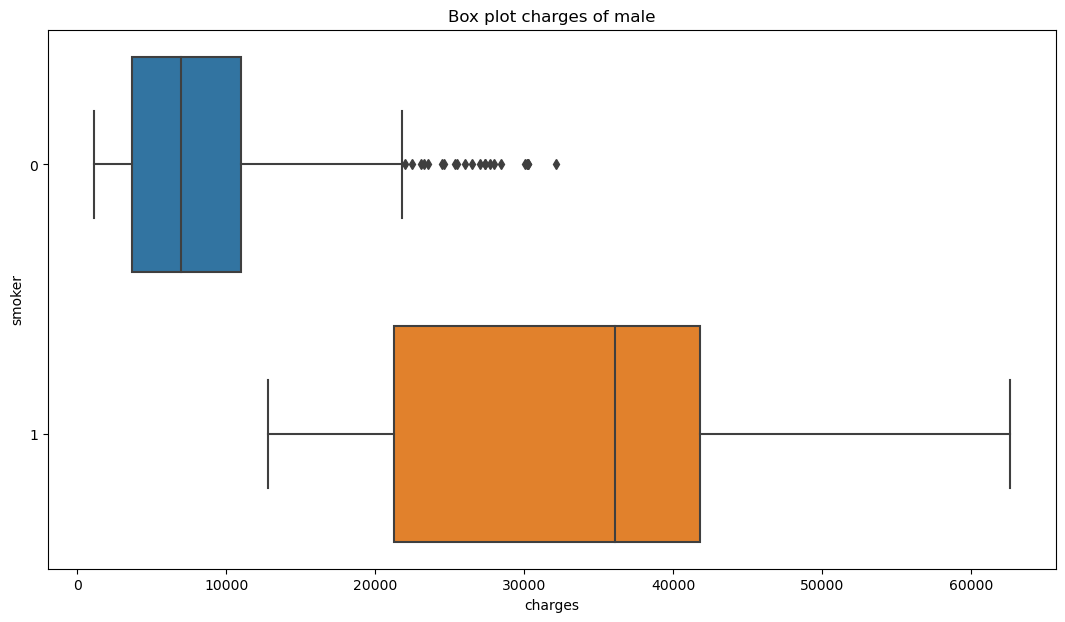

In [17]:
#Relationship between male and charges
plt.figure(figsize=(13,7))
plt.title("Box plot charges of male")
sns.boxplot(y="smoker",x="charges",data = data[(data.sex==1)],orient = "h")

The asuumption is true , that the medical expense f male is greater than that of females in addition t that medical expenses of smokers is greater than that of non - smokers

<Axes: >

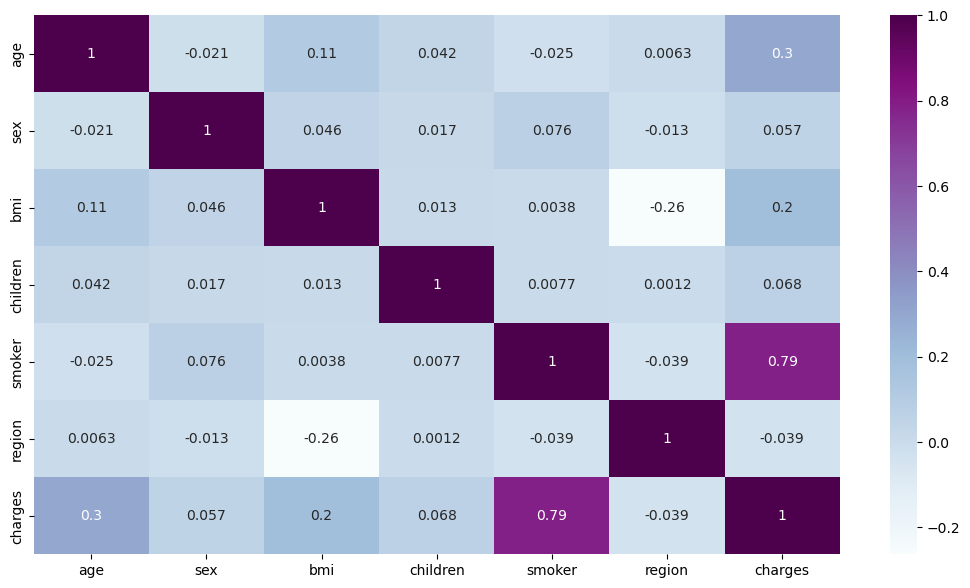

In [18]:
cor = data.corr()
plt.figure(figsize=(13,7))
sns.heatmap(cor,annot =True,cmap = "BuPu")

from above plot we can state that the smokers have more medical expenses. So it is a high impact on the cost of medical insurance followed by age and bmi whereas region,sex,children has no impact

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1300x700 with 0 Axes>

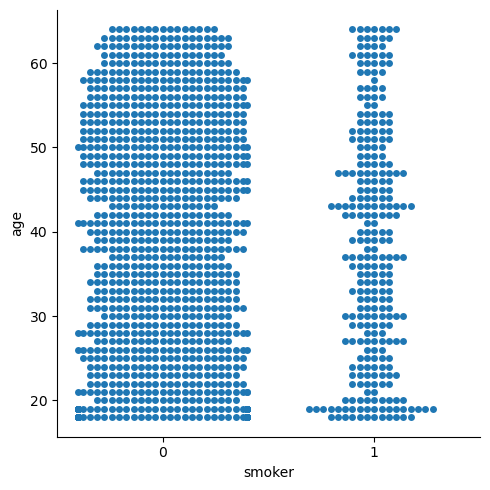

In [19]:
# relation between smoker and age distribution 

plt.figure(figsize=(13,7))
sns.catplot(x ="smoker",y = "age", kind = "swarm", data = data)


From above this graph we can see that their is a significant number of smoers at te age of 19

# multi-variate Analysis  whenever we have more than two variables for analsing 


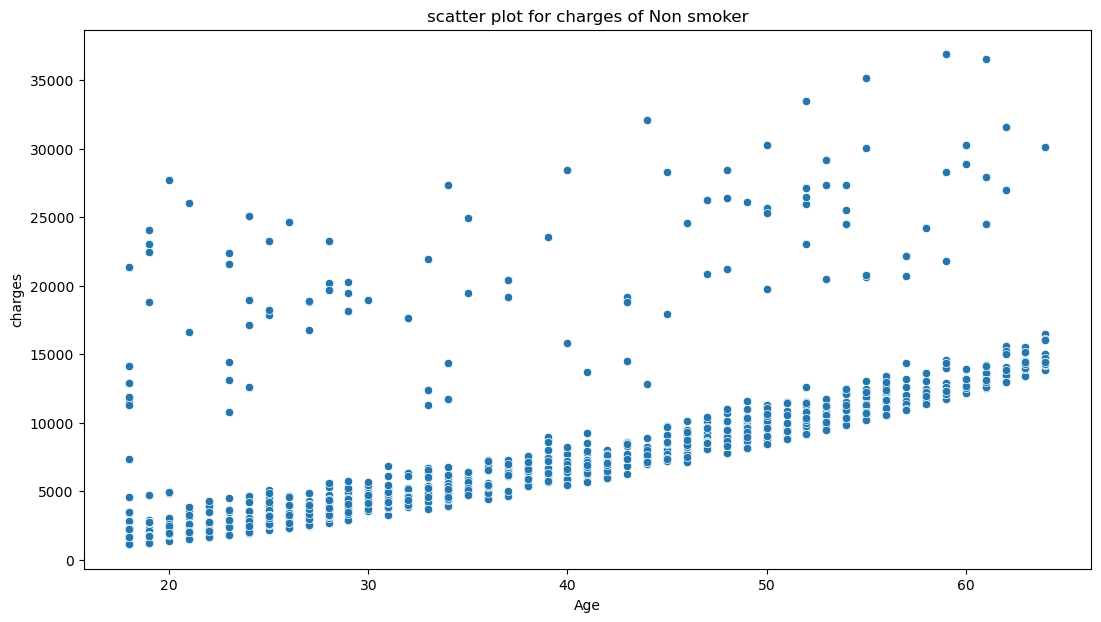

In [20]:
# relation between Age and charges for the Non smokers
plt.figure(figsize=(13,7))
plt.title("Scatterplot for charges f non-smokers")
sns.scatterplot(x="age",y = "charges",data = data[(data.smoker== 0)])
plt.title("scatter plot for charges of Non smoker")
plt.xlabel("Age")
plt.ylabel("charges")
plt.show()


majority of the points show that medical expenses  increase with the age which may be due to the fact that older people are more prone to illness.But their are some outliers which show other ilness or expenses which may lead to increase in medical expenses

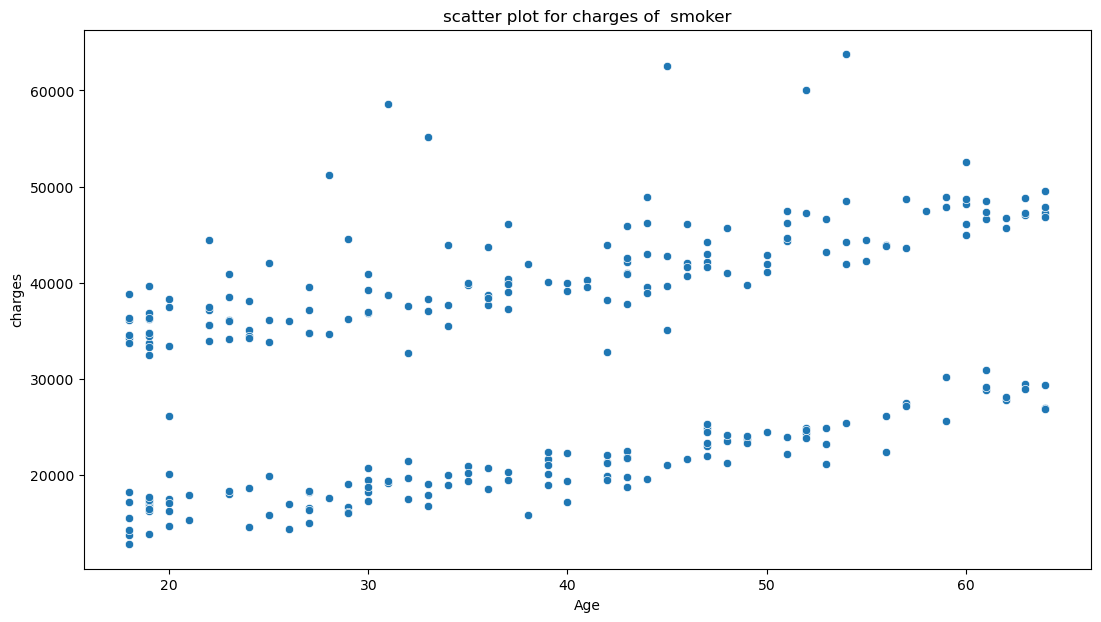

In [21]:
# relation between Age and charges for the  smokers
plt.figure(figsize=(13,7))
plt.title("Scatterplot for charges f non-smokers")
sns.scatterplot(x="age",y = "charges",data = data[(data.smoker== 1)])
plt.title("scatter plot for charges of  smoker")
plt.xlabel("Age")
plt.ylabel("charges")
plt.show()

in this graph there are two segments, ne with high medical expense which may due to the smoking related illness abd other with low medical expense wich may due to age related illness
Now in order to get more clear we can combine both the graphs

<Figure size 1300x700 with 0 Axes>

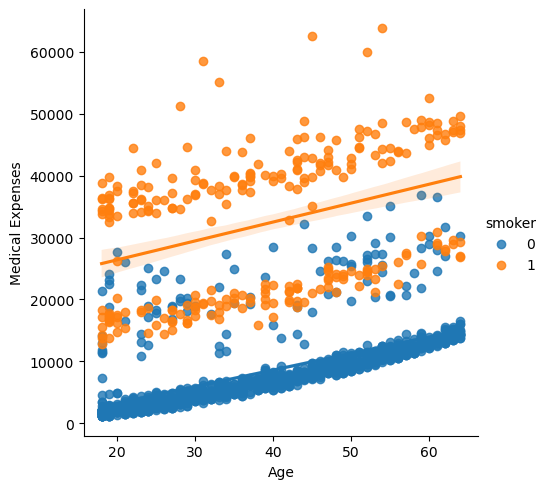

In [22]:
# Relation b/w age and charges for both smokker and non smoker 

plt.figure(figsize=(13,7))
sns.lmplot(x ="age",y="charges",data = data,hue = "smoker")
plt.xlabel("Age")
plt.ylabel("Medical Expenses")
plt.show()

Now, we can clearly understand the variation in charges with respect to age and smoking habits. The medical expenses of smokers are higher than that of Non-Smokers irrespective of age. In Non-Smokers, The cost of treatment increses with age which is obvious.

C:\Users\User\AppData\Local\Temp\ipykernel_8388\455785211.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.bmi >30]["charges"])


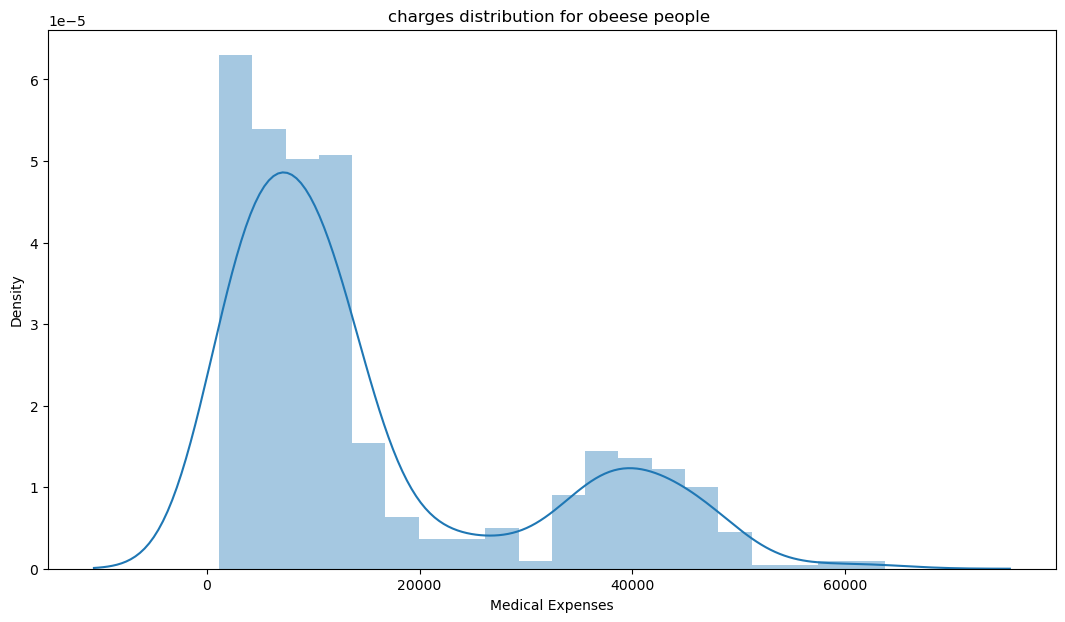

In [23]:
# RElation b/w bmi and medical expenses

plt.figure(figsize=(13,7))
sns.distplot(data[data.bmi >30]["charges"])
plt.title("charges distribution for obeese people ")
plt.xlabel("Medical Expenses")
plt.show()

Therefore people with bmi less than 30 are spending less where as people with bmi more than 30 are spending more

In [24]:
# feature selection 
# droping irrevelant data

data.drop("region",axis = 1,inplace = True)
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


## MODEL BUILDING & EVALUATION

LINEAR REGRESSION

In [25]:
x = data.drop("charges",axis = 1)
y = data.charges


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)


In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1003, 5), (335, 5), (1003,), (335,))

In [28]:
# linear regression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [29]:
# making prediction 
y_pred = reg.predict(x_test)


In [30]:
# Model Evaluation 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:',metrics.r2_score(y_test, y_pred))

MAE: 4180.7864229732395
RMSE: 6159.554567242219
R2 Score: 0.7486163979240839


# polynomial regression 

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg

PolynomialFeatures()

In [32]:
# Transforming the features to higher degree
x_train_poly = poly_reg.fit_transform(x_train)

# spliting the data 
x_train,x_test,y_train,y_test = train_test_split(x_train_poly,y_train,test_size = 0.25,random_state = 2)

In [33]:
# Train the model
plr = LinearRegression()
plr.fit(x_train,y_train)

LinearRegression()

In [34]:
# Making Predictioin

y_pred_plr = plr.predict(x_test)

In [35]:
# Model Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr)))
print('R2 Score:',metrics.r2_score(y_test, y_pred_plr))

MAE: 2984.9172081181555
RMSE: 4971.839673173044
R2 Score: 0.8147842022681622


My model is able to explain 78% of the total data set

Making Real time Prediction system

In [36]:
data.head

<bound method NDFrame.head of       age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770         1       0   1725.55230
2      28    1  33.000         3       0   4449.46200
3      33    1  22.705         0       0  21984.47061
4      32    1  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970         3       0  10600.54830
1334   18    0  31.920         0       0   2205.98080
1335   18    0  36.850         0       0   1629.83350
1336   21    0  25.800         0       0   2007.94500
1337   61    0  29.070         0       1  29141.36030

[1338 rows x 6 columns]>

In [39]:
## input the values 
age = 18
sex = 1
bmi = 29
children = 0
smoker = 1

## predicting the charges using random forest regression 

charge = reg.predict([[age,sex,bmi,children,smoker]])
print("The charges of this new patient is $", charge[0])

The charges of this new patient is $ 25642.14653246777


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
